In [1]:
import pandas as pd 
#import yfinance as yf 
from scipy.stats import spearmanr
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt 

#dict for individual stock DF storage
# stockdataframes = {}
# start_dte = "2019-01-01"
# end_dte = "2023-12-31"




In [41]:
#merge all stock dfs into one 
# full_df = pd.concat(stockdataframes.values(), keys=stockdataframes.keys())
filepath = 'Data/SP500.csv'
full_df = pd.read_csv(filepath)
#print(full_df)
#print(full_df.head())

#need to cut this to just values and tickers

#full_df = full_df.reset_index(level=0) 
#print(full_df.head())
full_df['Date'] = pd.to_datetime(full_df['Date'], utc=True)
##print(full_df.head())
#df['Date'] = pd.to_datetime(df['Date'])
#full_df.set_index('Date', inplace=True)
#print(full_df['Date'].head())

last_day_of_month = full_df['Date'] + pd.offsets.MonthEnd(0)

# Use boolean indexing to filter the DataFrame for the last day of each month
last_day_df = full_df[full_df['Date'].isin(last_day_of_month)]

# Reset the index if needed
last_day_df.reset_index(drop=True, inplace=True)

print(len(last_day_df))
print(last_day_df.head())

#new_df = df.iloc[:1000].copy()
#new_df.set_index('Date', inplace=True)
# Display the new DataFrame
#print(new_df.head())

#print(full_df.info())
#print(monthly_df)
#monthly_df = full_df.resample('M').agg(list)
#monthly_df.reset_index(drop=True, inplace=True)
#print(len(monthly_df))
#print(monthly_df)
#print(len(monthly_df))
#print(len(last_day_df))
#print(last_day_df.head())
#monthly_df.show()




20538
  Unnamed: 0                      Date       Close Symbol Security  \
0        MMM 2019-01-31 05:00:00+00:00  163.799927    MMM       3M   
1        MMM 2019-02-28 05:00:00+00:00  170.770477    MMM       3M   
2        MMM 2019-04-30 04:00:00+00:00  156.047623    MMM       3M   
3        MMM 2019-05-31 04:00:00+00:00  132.667892    MMM       3M   
4        MMM 2019-07-31 04:00:00+00:00  145.100082    MMM       3M   

   GICS Sector  
0  Industrials  
1  Industrials  
2  Industrials  
3  Industrials  
4  Industrials  


In [3]:
sp500_tickers = full_df['Symbol'].unique().tolist() 
exclude = ['BRK.B', 'BF.B', 'ABNB', 'CARR', 'CEG', 'CTVA', 'DOW', 'FOXA', 'FOX', 'GEHC', 'KVUE', 'OTIS', 'UBER', 'VLTO']
sp500_tickers = [ticker for ticker in sp500_tickers if ticker not in exclude]


In [4]:
def spearman_ranking(a):
    input_array = np.array(a)
    sorted_indices = np.argsort(-input_array)
    ranks = np.empty_like(sorted_indices)
    ranks[sorted_indices] = np.arange(1, len(input_array) + 1)
    return ranks


def spearman_coefficient(stock1, stock2):
    a = spearman_ranking(stock1)
    b = spearman_ranking(stock2)
    n = (len(a) + len(b)) / 2
    rho = 1 - (6 * np.sum((a - b)**2) / (n * (n**2 - 1)))
    return rho


In [5]:
# print(len(monthly_df))
# Calculate Spearman correlation coefficient
#corr_matrix = monthly_df.pivot(columns='Symbol', values='Close').pct_change().corr(method='spearman').dropna()
# missing_values = last_day_df['Close'].isnull().sum()
# print(missing_values)
corr_matrix = last_day_df.pivot(index='Date',columns='Symbol', values='Close').pct_change().corr(method='spearman').dropna()

print(corr_matrix.head())
print(len(corr_matrix))

Symbol         A       AAL      AAPL      ABBV       ABT      ACGL       ACN  \
Symbol                                                                         
A       1.000000  0.410279  0.504530  0.491463  0.561498  0.294077  0.655401   
AAL     0.410279  1.000000  0.305401  0.076307  0.427352  0.297735  0.322822   
AAPL    0.504530  0.305401  1.000000  0.258014  0.573171  0.284146  0.751916   
ABBV    0.491463  0.076307  0.258014  1.000000  0.155226  0.308362  0.463937   
ABT     0.561498  0.427352  0.573171  0.155226  1.000000  0.270906  0.692857   

Symbol      ADBE       ADI       ADM  ...      WYNN       XEL       XOM  \
Symbol                                ...                                 
A       0.479443  0.565331  0.527875  ...  0.347909  0.331185  0.295819   
AAL     0.237631  0.556620  0.421429  ...  0.554530 -0.126481  0.503833   
AAPL    0.707666  0.487631  0.469512  ...  0.433798  0.348955  0.140767   
ABBV    0.175610  0.275958  0.443902  ...  0.254530  0.164111  0

In [6]:
print(corr_matrix.head())

Symbol         A       AAL      AAPL      ABBV       ABT      ACGL       ACN  \
Symbol                                                                         
A       1.000000  0.410279  0.504530  0.491463  0.561498  0.294077  0.655401   
AAL     0.410279  1.000000  0.305401  0.076307  0.427352  0.297735  0.322822   
AAPL    0.504530  0.305401  1.000000  0.258014  0.573171  0.284146  0.751916   
ABBV    0.491463  0.076307  0.258014  1.000000  0.155226  0.308362  0.463937   
ABT     0.561498  0.427352  0.573171  0.155226  1.000000  0.270906  0.692857   

Symbol      ADBE       ADI       ADM  ...      WYNN       XEL       XOM  \
Symbol                                ...                                 
A       0.479443  0.565331  0.527875  ...  0.347909  0.331185  0.295819   
AAL     0.237631  0.556620  0.421429  ...  0.554530 -0.126481  0.503833   
AAPL    0.707666  0.487631  0.469512  ...  0.433798  0.348955  0.140767   
ABBV    0.175610  0.275958  0.443902  ...  0.254530  0.164111  0

In [113]:

#create graph 
G = nx.Graph() 

for stock in sp500_tickers: 
    G.add_node(stock) 
    
#add links 
for i in range(len(sp500_tickers)): 
    for j in range(i + 1, len(sp500_tickers)):
        stock1 = sp500_tickers[i]
        stock2 = sp500_tickers[j]
        
        # Check if the stock symbols are present in the correlation matrix

        # CHANGED CORRELATION THRESHOLD TO THIS IF BLOCK
        if stock1 in corr_matrix.index and stock2 in corr_matrix.columns:
            correlation_coefficient = corr_matrix.loc[stock1, stock2]
            if not np.isnan(correlation_coefficient) and abs(correlation_coefficient) > 0.7:
                G.add_edge(stock1, stock2, weight=correlation_coefficient)




At visualization
Drawing edges
Done Drawing edges
drawing edge labels
End


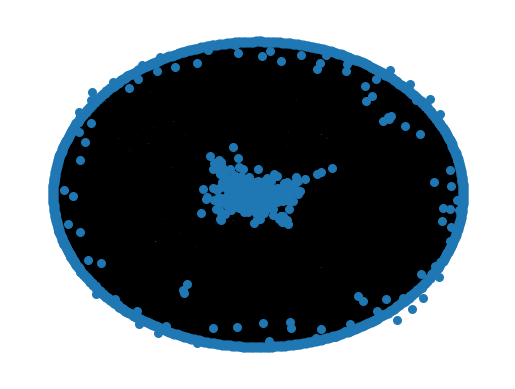

In [114]:
print("At visualization")
#visualization 
#pos = nx.spring_layout(G, seed=42)
pos = nx.spring_layout(G)
# Draw only edges with significant correlation

# I COMMENTED OUT THIS LINE BECAUSE I THINK IT DOES NOTHING
# I MOVOED THE CORRELATION THRESHOLD TO THE PREVIOUS CELL
#edges = [(source, target) for source, target, data in G.edges(data=True) if abs(data['weight']) > 0.5]


# NEED TO FLIP THE WEIGHTS OF THE SPEARMAN
nx.draw_networkx_nodes(G, pos, node_size=30)
#nx.draw_networkx_labels(G, pos, font_size=8)
print("Drawing edges")
#nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='gray')
print("Done Drawing edges")
labels = nx.get_edge_attributes(G, 'weight')
print("drawing edge labels")
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
print("End")
#nx.draw_circular(G, node_size=40)
#nx.draw_kamada_kawai(G, node_size=40)
#nx.draw_spectral(G, node_size=40)
# deg = G.degree()
# to_remove = [n for n in deg if deg[n] == 0]
# G.remove_nodes_from(to_remove)
# nodes_to_remove = [node for node, degree in G.degree() if degree == 0]
# print(nodes_to_remove)
# G.remove_nodes_from(nodes_to_remove)
#G.remove_nodes_from((n for n,d in G.degree_iter() if d == 0))
nx.draw_circular(G, node_size=40)
#plt.show() #its a bullshit hgraph and idk if the coefficient is actually doing anything  useful here


In [115]:
print(G.size()) # edges
print(len(G)) # nodes
degrees = [G.degree(node) for node in G]
print("Average Degree:", np.mean(degrees))

3126
489
Average Degree: 12.785276073619633


In [116]:
degrees = [G.degree(node) for node in G]
degrees = [degree for degree in degrees if degree > 0]
kmin = min(degrees)
kmax = max(degrees)
print(kmin)
print(kmax)
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

1
95


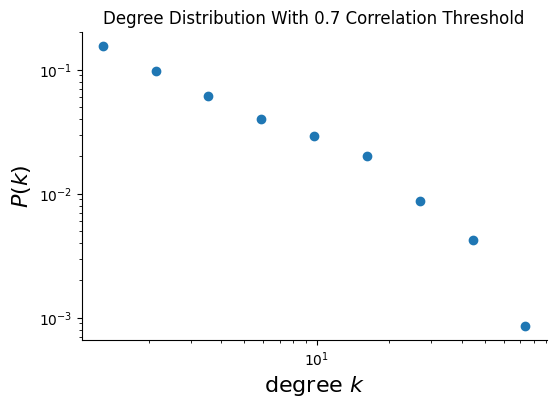

In [117]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.title(r"Degree Distribution With 0.7 Correlation Threshold")

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

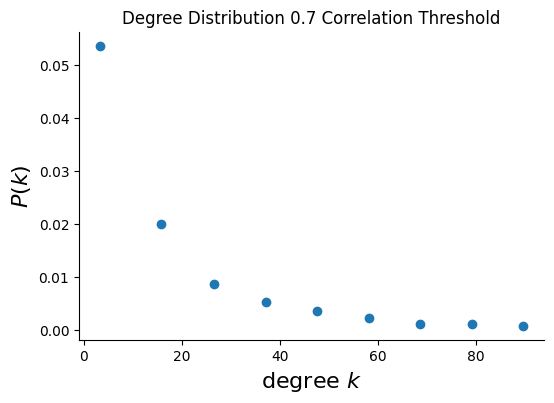

In [118]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.title(r"Degree Distribution 0.7 Correlation Threshold")

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [54]:
#nx.write_gml(G, '500trialpoint7.gml')